In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_38/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


**Setup**

Si la instalación de lightgbm da error, ejecutar en Anaconda Prompt 

`conda install -c conda-forge xgboost=1.4.0`

`conda install -c conda-forge lightgbm=3.2.1`

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


## Prediciendo quiebra de empresas

En este Checkpoint vamos a trabajar en predecir la quiebra de empresas en Polonia. La información fue obtenida del Servicio de Información de Mercados Emergentes (EMIS por sus siglas en inglés), que es una base de datos que contiene información de los mercados emergentes alrededor del mundo. Las compañías en bancarrota fueron analizadas en el período 2000-2012, mientras que las que continuan operando se evaluaron desde 2007 a 2013.

En este caso sólo vamos a trabajar con el tercer año de los disponibles. Se puede consultar la página de UCI en donde se encuentra alojado <a href='https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data'> aqui </a> 

El dataset empleado tiene datos de las empresas y su estatus tres años después.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
df = pd.read_csv("../Data/3year.csv", index_col='Unnamed: 0')

In [4]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


Acá hay una descripción de los atributos

- Attr1: net profit / total assets
- Attr2: total liabilities / total assets
- Attr3: working capital / total assets
- Attr4: current assets / short-term liabilities
- Attr5: [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
- Attr6: retained earnings / total assets
- Attr7: EBIT / total assets
- Attr8: book value of equity / total liabilities
- Attr9: sales / total assets
- Attr10: equity / total assets
- Attr11: (gross profit + extraordinary items + financial expenses) / total assets
- Attr12: gross profit / short-term liabilities
- Attr13: (gross profit + depreciation) / sales
- Attr14: (gross profit + interest) / total assets
- Attr15: (total liabilities * 365) / (gross profit + depreciation)
- Attr16: (gross profit + depreciation) / total liabilities
- Attr17: total assets / total liabilities
- Attr18: gross profit / total assets
- Attr19: gross profit / sales
- Attr20: (inventory * 365) / sales
- Attr21: sales (n) / sales (n-1)
- Attr22: profit on operating activities / total assets
- Attr23: net profit / sales
- Attr24: gross profit (in 3 years) / total assets
- Attr25: (equity - share capital) / total assets
- Attr26: (net profit + depreciation) / total liabilities
- Attr27: profit on operating activities / financial expenses
- Attr28: working capital / fixed assets
- Attr29: logarithm of total assets
- Attr30: (total liabilities - cash) / sales
- Attr31: (gross profit + interest) / sales
- Attr32: (current liabilities * 365) / cost of products sold
- Attr33: operating expenses / short-term liabilities
- Attr34: operating expenses / total liabilities
- Attr35: profit on sales / total assets
- Attr36: total sales / total assets
- Attr37: (current assets - inventories) / long-term liabilities
- Attr38: constant capital / total assets
- Attr39: profit on sales / sales
- Attr40: (current assets - inventory - receivables) / short-term liabilities
- Attr41: total liabilities / ((profit on operating activities + depreciation) * (12/365))
- Attr42: profit on operating activities / sales
- Attr43: rotation receivables + inventory turnover in days
- Attr44: (receivables * 365) / sales
- Attr45: net profit / inventory
- Attr46: (current assets - inventory) / short-term liabilities
- Attr47: (inventory * 365) / cost of products sold
- Attr48: EBITDA (profit on operating activities - depreciation) / total assets
- Attr49: EBITDA (profit on operating activities - depreciation) / sales
- Attr50: current assets / total liabilities
- Attr51: short-term liabilities / total assets
- Attr52: (short-term liabilities * 365) / cost of products sold)
- Attr53: equity / fixed assets
- Attr54: constant capital / fixed assets
- Attr55: working capital
- Attr56: (sales - cost of products sold) / sales
- Attr57: (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
- Attr58: total costs /total sales
- Attr59: long-term liabilities / equity
- Attr60: sales / inventory
- Attr61: sales / receivables
- Attr62: (short-term liabilities *365) / sales
- Attr63: sales / short-term liabilities
- Attr64: sales / fixed assets
- class: toma los valores "b'0'" y "b'1'" indicando si la empresa quebro o no.

### Ejercicio 1
1) Obtener la `matriz de features X` y la `variable target y`  
2) Analizar la forma (shape) del dataset.  
3) Ver los valores que toma la variable target  
4) Aplicar LabelEncoder sobre la variable target.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(4885, 65)

In [8]:
X = df.drop(['class'], axis=1)
y = df['class']

In [9]:
y.value_counts(normalize=True)

b'0'    0.978096
b'1'    0.021904
Name: class, dtype: float64

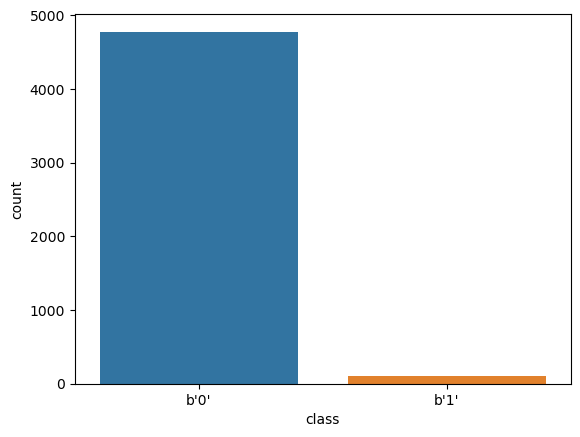

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = df['class'])
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enc = LabelEncoder()

y = enc.fit_transform(df['class'])

### Ejercicio 2
1) Realizar un split en Train y Test, dejando un 20% para test  
2) crear un generador de CV utilizando: `cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)` para luego pasarselo tanto a `GridSearchCV` como a `cross_val_score`


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1203, test_size = 0.2)

In [14]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1203)


In [15]:
gbclf = GradientBoostingClassifier()

In [16]:
params = {'n_estimators':[1000] , 
          'learning_rate':[0.1, 0.3],
          'max_depth' : [3, 5]}

In [17]:
gs = GridSearchCV(gbclf ,param_grid=params, n_jobs=-1, cv=kfold, scoring='f1')

In [18]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1203, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [3, 5],
                         'n_estimators': [1000]},
             scoring='f1')

In [19]:
best_gbclf=gs.best_estimator_

In [20]:
best_gbclf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1000)

In [21]:
cv_score_train = cross_val_score(best_gbclf, X_train, y_train, cv=kfold, n_jobs=-1, scoring='f1')
cv_score_train

array([0.19047619, 0.1       , 0.08695652, 0.16666667, 0.27272727])

In [22]:
cv_score_train.mean()

0.16336533032185205

In [23]:
from sklearn.metrics import f1_score

f1_score_test = f1_score(y_test, best_gbclf.predict(X_test))
f1_score_test

0.24

In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [25]:
dmclf = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [26]:
# Classification Report de Dummie Classifier
print(classification_report(y_test, dmclf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       956
           1       0.00      0.00      0.00        21

    accuracy                           0.98       977
   macro avg       0.49      0.50      0.49       977
weighted avg       0.96      0.98      0.97       977



/Users/csuarezgurruchaga/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Classification Report de gradient boost classfier
print(classification_report(y_test, best_gbclf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       956
           1       0.75      0.14      0.24        21

    accuracy                           0.98       977
   macro avg       0.87      0.57      0.62       977
weighted avg       0.98      0.98      0.97       977



In [28]:
pd.Series(best_gbclf.predict(X_test)).value_counts()

0    973
1      4
dtype: int64

In [29]:
#Matriz de confusion de Gradient Booost classifier

confusion_matrix(y_test, best_gbclf.predict(X_test))

array([[955,   1],
       [ 18,   3]])

In [30]:
#Matriz de confusion de Dummie Classifier

confusion_matrix(y_test,  dmclf.predict(X_test))

array([[956,   0],
       [ 21,   0]])

### Ejercicio 3: Xgboost
1) Importar el clasificador `XGBoost` del módulo `xgboost.sklearn` que nos provee clases y métodos aceptados por la API de sklearn. La clase que contiene este clasificador se llama XGBClassifier


In [77]:
from xgboost.sklearn import XGBClassifier


2) Utilizando el siguiente diccionario de parametros, optimizar los hiperparámetros.  
3) Imprimir en pantalla la mejor selección de hiperparámetros

In [78]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold 

params = {  
    "n_estimators": [50,100,500],      # Number of boosted trees to fit.
    "max_depth": [1,2,3,4],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1],      # Boosting learning rate (xgb’s “eta”)
}
cv = StratifiedKFold(n_splits = 5 , shuffle = True, random_state = 1203)
xgb = XGBClassifier(scale_pos_weight = 194) # 972/5 me da la relacion de desbalanceo, 
                                            # siempre sobre la clase positiva trabaja

In [79]:
gsearch = GridSearchCV(xgb, params, scoring='f1', n_jobs=-1, cv=cv).fit(X_train, y_train)

/Users/csuarezgurruchaga/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:22:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [80]:
best_xgb = gsearch.best_estimator_

5) Evaluar el rendimiento del estimador optimo, utilizando cross validation.  
(pasarle como argumento cv el generador de CV splits del creado en el punto 3)  
**nota:** ver función evaluar_rendimiento() utilizada en la notebook `2-Boosting_Practica.ipynb`

In [81]:
score_train = cross_val_score(best_xgb, X_train, y_train, cv=cv, n_jobs=-1, scoring='f1')
print(score_train,'\n')
print(score_train.mean(),'\n')
print('Desvio std de: ',score_train.std())

[0.32       0.41666667 0.2962963  0.28571429 0.37037037] 

0.3378095238095238 

Desvio std de:  0.04905731084647296


In [82]:
score_test = f1_score(y_test, best_xgb.predict(X_test))
score_test

0.4615384615384615

In [83]:
# Dataset desbalanceado, no me guio
accuracy_score(y_test, best_xgb.predict(X_test))

0.9785056294779939

6) utilizando roc_auc_score de la libreria sklearn.metrics, determinar el valor del ROC.

In [84]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, best_xgb.predict(X_test))


0.7095786013150029

7) utilizando plot_roc de la libreria sklearn.metrics, graficamos la curva ROC por clase

<Figure size 1080x576 with 0 Axes>

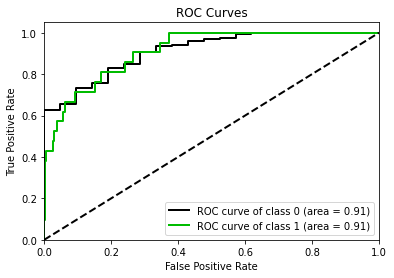

In [85]:
from scikitplot.metrics import plot_roc
%matplotlib inline
plt.show()
plt.figure(figsize=(15,8))

plot_roc(y_test, best_xgb.predict_proba(X_test), plot_micro = False, plot_macro= False);


### BONUS: 
graficar la importancia de los atributos del estimador optimizado.  

https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

In [86]:
best_xgb.feature_importances_

array([0.01386108, 0.00789424, 0.00556785, 0.02604259, 0.02369124,
       0.03849015, 0.00178272, 0.00059861, 0.02226298, 0.00433808,
       0.00840944, 0.01622468, 0.10417272, 0.        , 0.00423845,
       0.00787611, 0.00050626, 0.        , 0.01885754, 0.01854504,
       0.05619079, 0.01390542, 0.02288218, 0.01146513, 0.02798761,
       0.0636465 , 0.01638079, 0.00133971, 0.01471137, 0.00222398,
       0.01884378, 0.01788859, 0.00630138, 0.1070427 , 0.01727828,
       0.02293576, 0.00733458, 0.00072386, 0.01836064, 0.003514  ,
       0.01631043, 0.01568703, 0.02524587, 0.01628004, 0.01492371,
       0.01190476, 0.01297348, 0.00678821, 0.00586671, 0.0165635 ,
       0.00648408, 0.00489546, 0.0048415 , 0.00609052, 0.0035823 ,
       0.00370001, 0.00839989, 0.01170946, 0.00698367, 0.        ,
       0.00279358, 0.00978143, 0.0035336 , 0.01034391], dtype=float32)

In [92]:
pd.DataFrame({'FEATURES':X_train.columns, 'IMPORTANCIA':best_xgb.feature_importances_}).sort_values('IMPORTANCIA', ascending =False).head(5)

,FEATURES,IMPORTANCIA
33,Attr34,0.107043
12,Attr13,0.104173
25,Attr26,0.063646
20,Attr21,0.056191
5,Attr6,0.038490


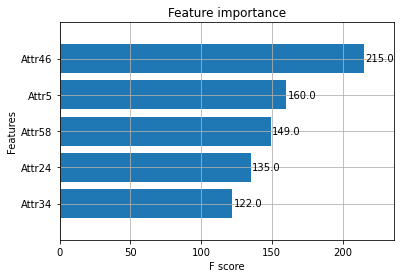

In [88]:
from xgboost import plot_importance
plot_importance(best_xgb, height = 0.8,max_num_features=5);